In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

sns.set(style="whitegrid")

file_path = 'twitter_training.csv'

df = pd.read_csv(file_path, header=None)

df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']

print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows:")
display(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

First 5 rows:


,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


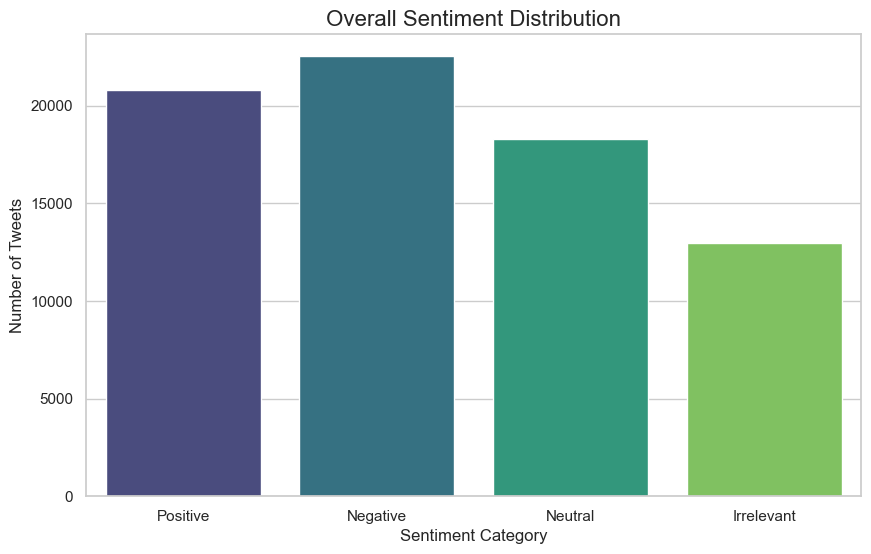

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], palette='viridis')

plt.title('Overall Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.show()

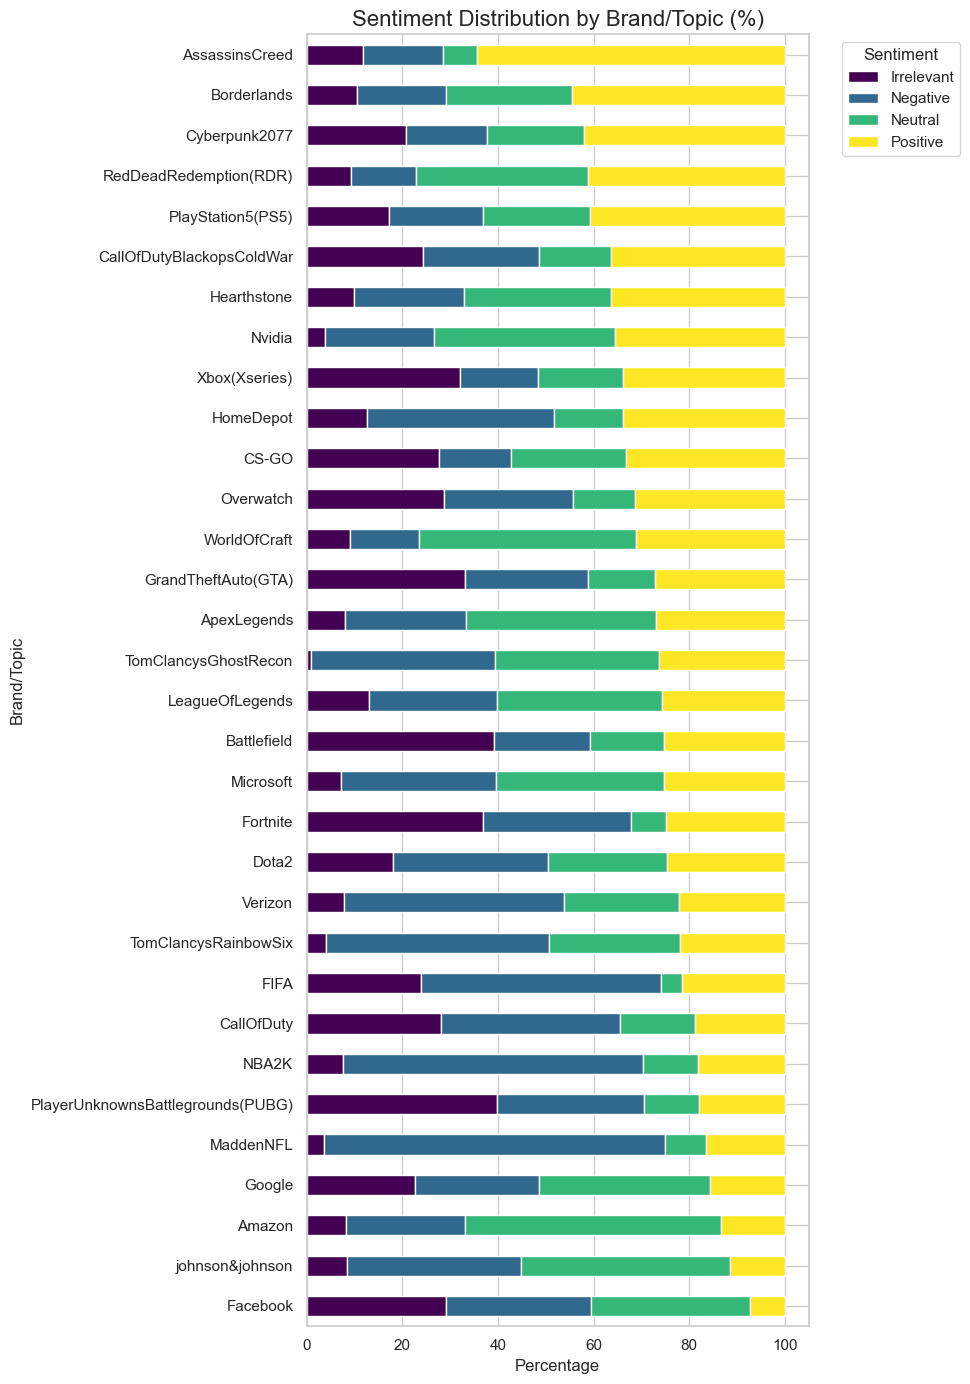

Most Positive Brand: AssassinsCreed
Most Negative Brand: MaddenNFL


In [19]:
# Group by Entity and Sentiment, then unstack to get a matrix
entity_sentiment = df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)

# Convert counts to percentages
entity_pcts = entity_sentiment.div(entity_sentiment.sum(axis=1), axis=0) * 100

# Sort by 'Positive' sentiment to make the chart easier to read
entity_pcts_sorted = entity_pcts.sort_values('Positive', ascending=True)

# Plotting the stacked bar chart
ax = entity_pcts_sorted.plot(kind='barh', stacked=True, figsize=(10, 14), colormap='viridis')

plt.title('Sentiment Distribution by Brand/Topic (%)', fontsize=16)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Brand/Topic', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Most Positive Brand:", entity_pcts.sort_values('Positive', ascending=False).index[0])
print("Most Negative Brand:", entity_pcts.sort_values('Negative', ascending=False).index[0])

C:\Users\user\AppData\Local\Temp\ipykernel_18012\2211861140.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pos_words, x='Count', y='Word', ax=axes[0], palette='Greens_r')
C:\Users\user\AppData\Local\Temp\ipykernel_18012\2211861140.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_neg_words, x='Count', y='Word', ax=axes[1], palette='Reds_r')


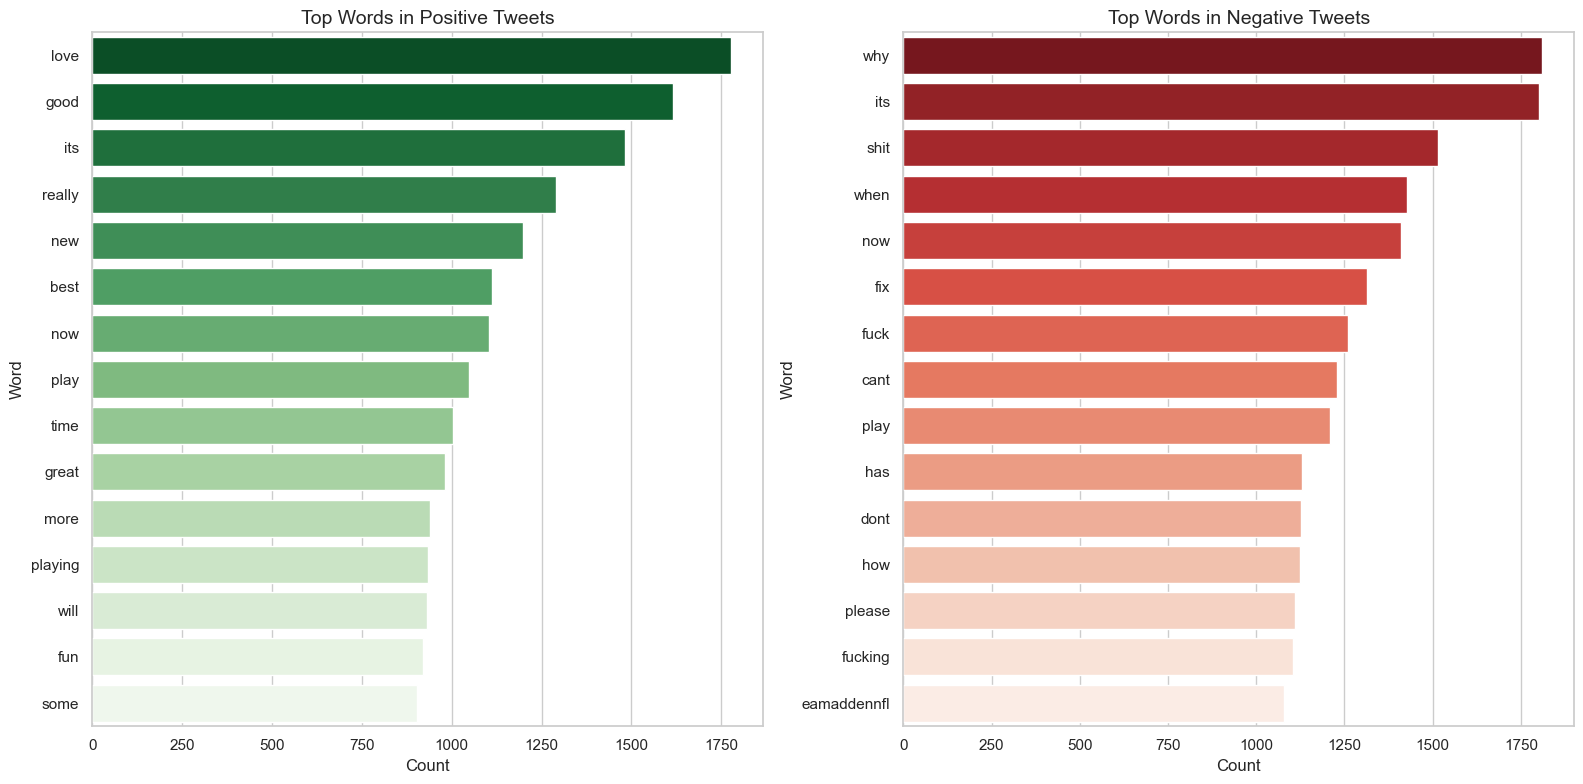

In [4]:
# Helper function to clean text and get top words
def get_top_words(text_series, n=15):
    # Join all text and convert to lowercase
    all_text = ' '.join(text_series.dropna().astype(str).tolist()).lower()
    
    # Remove non-alphabetic characters
    all_text = re.sub(r'[^a-z\s]', '', all_text)
    words = all_text.split()
    
    # Define a custom list of stopwords to remove common, uninformative words
    stopwords = set(['the', 'and', 'to', 'of', 'a', 'in', 'is', 'for', 'on', 'i', 'it', 'this', 'that', 
                     'with', 'my', 'you', 'are', 'me', 'have', 'be', 'so', 'just', 'at', 'but', 'not', 
                     'was', 'like', 'im', 'all', 'do', 'can', 'if', 'your', 'about', 'out', 'up', 'get', 
                     'from', 'what', 'an', 'or', 'one', 'they', 'we', 'game', 'unk'])
    
    # Filter out stopwords and very short words
    filtered_words = [w for w in words if w not in stopwords and len(w) > 2]
    
    return Counter(filtered_words).most_common(n)

# Extract top words for Positive and Negative sentiments
top_pos = get_top_words(df[df['Sentiment'] == 'Positive']['Tweet_Content'])
top_neg = get_top_words(df[df['Sentiment'] == 'Negative']['Tweet_Content'])

# Convert to DataFrames for easier plotting
df_pos_words = pd.DataFrame(top_pos, columns=['Word', 'Count'])
df_neg_words = pd.DataFrame(top_neg, columns=['Word', 'Count'])

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Positive Words Plot
sns.barplot(data=df_pos_words, x='Count', y='Word', ax=axes[0], palette='Greens_r')
axes[0].set_title('Top Words in Positive Tweets', fontsize=14)

# Negative Words Plot
sns.barplot(data=df_neg_words, x='Count', y='Word', ax=axes[1], palette='Reds_r')
axes[1].set_title('Top Words in Negative Tweets', fontsize=14)

plt.tight_layout()
plt.show()